#Example 4: BIG MART SALES PREDICTION
----
**Mô tả dự án:**

Các nhà khoa học dữ liệu tại hệ thống Big Mart đã tập hợp dữ liệu bán hàng năm 2013 của 1559 sản phẩm tại 10 cửa hàng ở các thành phố khác nhau. Một số thuộc tính nhất định của từng sản phẩm và của mỗi cửa hành đã được xác định. 

![alt text](https://s3.ap-south-1.amazonaws.com/datahack-prod/profile_photos/final-grocery_480.png)

**Yêu cầu:** Xây dựng mô hình dự đoán và tìm ra được doanh số bán hàng cho mỗi một sản phẩm tại một cửa hàng cụ thể. Sử dụng mô hình này BigMart sẽ cố gắng hiểu các thuộc tính của các sản phẩm và các cửa hàng, cái mà có vai trò chính trong việc tăng doanh số bán hàng.

**Dữ liệu:**
* Tập Train bao gồm: 8523 bản ghi
* Tập Test bao gồm: 5681 bản ghi

Tập Train bao gồm 12 thuộc tính, trong đó có 11 features và 01 ground truth.
Danh sách các thuộc tính của mỗi một sản phẩm bao gồm:

1.   Item_Identifier: thuộc tính ID sản phẩm, nó là duy nhất được gán cho mỗi mục riêng biệt. Bao gồm 1 chuỗi ký tự và số có độ dài 5. (Data type: Ký tự + số; Example: FDN15)
2.   Item_Weight: Thuộc tính cho biết khối lượng của sản phẩm (Data type: Nummeric (float);)
3.  Item_Fat_Content: Thuộc tính cho biết lượng chất béo trong sản phẩm là thấp hay không? Thuộc tính này có 2 giá trị ['Low Fat','Regular'], Tuy nhiên trong tập dữ liệu, thuộc tính 'Low Fat' cũng có thể được viết ở dạng 'LF', 'Regular' cũng có thể được viết ở dạng 'reg' (Data type: Ký tự; Examle: Low Fat)
4. Item_Visibility: Thuộc tính này cho biết tỷ lệ % của tổng diện tích hiển thị của tất cả các sản phẩm cùng loại này trong một cửa hàng được phân bổ cho từng sản phẩm cụ thể.
5. Item_Type: Thuộc tính này cho biết sản phẩm này thuộc loại danh mục nào; Có tất cả 16 loại sản phẩm khác nhau bao gồm: Dairy - Soft Drinks - Meat - Fruits and Vegetables - Household - Baking Goods - Snack Foods - Frozen Foods - Breakfast - Health and Hygiene - Hard Drinks - Canned - Breads - Starchy Foods - Seafood - Others (Data type: Ký tự; Example: Meat)
6. Item_MRP: Thuộc tính này cho biết mức giá bán lẻ cao nhất của sản phẩm (Data type: numeric(float))
7. Outlet_Identifier: Thuộc tính này cho biết ID của cửa hàng mà sản phẩm này được bán, là một chuỗi gồm 6 ký tự và số (Data type: Alphanumeric; Example: OUT049); Thuộc tính này có tất cả 10 giá trị khác nhau tương ứng với 10 cửa hàng.
8. Outlet_Establishment_Year: Thuộc tính này cho biết năm mà cửa hàng bán sản phẩm này được thành lập (Data type: Numeric (Integer) )
9. Outlet_Size: Thuộc tính này cho biết kích thước của cửa hàng về diện tích mặt đất được bao phủ. Giá trị của thuộc tính này được mô tả trong 3 loại:  High - Medium - Small (Data type: Alpha)
10. Outlet_Location_Type: Thuộc tính này cho biết kích thước của thành phố, nơi mà cửa hàng bán sản phẩm này đặt ở đó. Giá trị của thuộc tính này là một trong 3 giá trị sau: 'Tier 1 - Tier 2 - Tier 3' (Data type: Alpha)
11. Outlet_Type: Thuộc tính này cho biết loại cửa hàng bán sản phẩm này là cửa hàng tạp hóa hay là siêu thị, 10 cửa hàng sẽ được chia vào 4 loại bao gồm: Supermarket Type1 - Supermarket Type2 - Supermarket Type3 - Grocery Store (Data type: Alpha)
12. Item_Outlet_Sales (Outcome - ground truth): Đây là thuộc tính đầu ra của mô hình dự báo. Nó chứa doanh số bán sản phẩm tại một cửa hàng cụ thể.  

----
DangVanNam@Department of Computer Science@FIT-HUMG




In [0]:
#Khai báo sử dụng thư viện
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## 1) Tải tập dữ liệu BigMart
---
Thực hiện việc load file dữ liệu (Train.csv, Test.csv) từ Google Drive và Phân tích một số số liệu tổng quan của tập dữ liệu;
Giúp cho ta cái nhìn tổng quan về Tập dữ liệu.

In [2]:
#Mount tới Google Drive để tải tập dữ liệu
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path_train ="/content/drive/My Drive/Colab Notebooks/10Project/Data_bigmart/Train.csv"
path_test = "/content/drive/My Drive/Colab Notebooks/10Project/Data_bigmart/Test.csv"

#Đọc dữ liệu từ file csv vào các biến

train_original =pd.read_csv(path_train)
test_original = pd.read_csv(path_test)

In [0]:
#Hiển thị 10 dữ liệu đầu tiên trong trập Train:
train_original.loc[:10]

In [0]:
#Các thông tin chung của Tâp Train
train_original.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [0]:
#Thống kê dữ liệu có thuộc tính kiểu Object:

train_original.describe(include='O')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [0]:
#Thông kê dữ liệu có thuộc tính kiểu Numberic:

train_original.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [0]:
#Kiểm tra dữ liệu missing trong tập Train:
train_original.isnull().sum()

#Trong tập Train (8523) có 2 thuộc tính chứa giá trị null bao gồm:
# Item_weight: 1463 sản phẩm
# Outlet_Size: 2410 sản phẩm

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [0]:
#Kiểm tra dữ liệu missing trong tập Test:
test_original.isnull().sum()

#Trong tập Test (5681) có 2 thuộc tính chứa giá trị null bao gồm:
# Item_weight: 976 sản phẩm
# Outlet_Size: 1606 sản phẩm

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

## 2) Trực quan hóa tập dữ liệu đầu vào
----
Sử dụng các biểu đồ để xem xét một số thuộc tính của tập dữ liệu, Qua đó có cái nhìn tổng quan hơn về Dữ liệu 

In [0]:
for i in train_original.describe().columns:
    sns.distplot(train_original[i].dropna())
    plt.show()

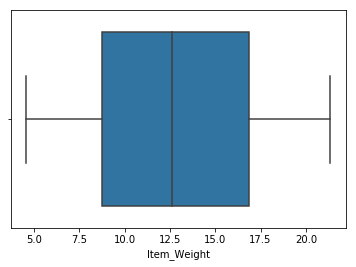

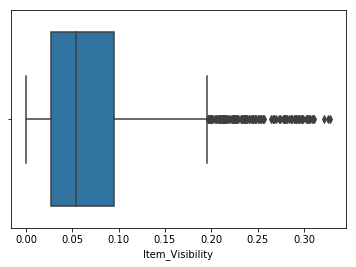

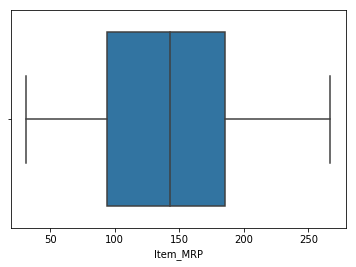

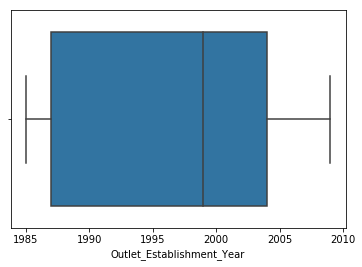

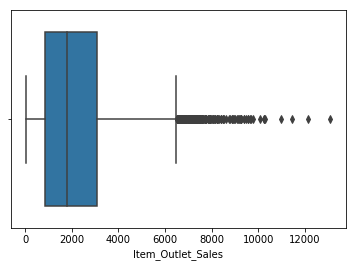

In [0]:
for i in train_original.describe().columns:
    sns.boxplot(train_original[i].dropna())
    plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

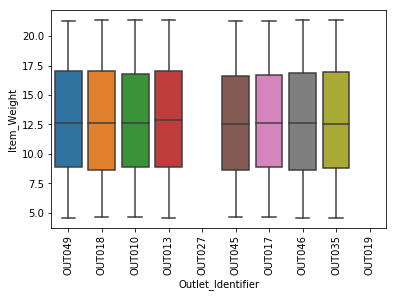

In [0]:
sns.boxplot(y=train_original['Item_Weight'],x=train_original['Outlet_Identifier'])
plt.xticks(rotation='vertical')

#Không có Dữ liệu Weight tại hai cửa hàng OUT027 và OUT019

In [0]:
train_original[train_original['Outlet_Identifier']=='OUT027']

## 3) Tiền xử lý dữ liệu
----


### 3.1) Chuẩn hóa dữ liệu Item_Fat_Content
---
Thuộc tính Item_Fat_Content: Cho biết lượng chất béo có trong sản phẩm. Có 2 giá trị của Fat_Content: Low Fat và Regular; Tuy nhiên, giá trị không thống nhất và được biểu diễn bởi các dạng khác nhau, cần chuẩn hóa các giá trị của thuộc tính này về cùng một kiểu:

In [0]:
train1 = train_original
test1=test_original

combine1=[train1,test1]


In [0]:
#Các giá trị của thuộc tính Fat_Content trước khi xử lý:
train_original['Item_Fat_Content'].value_counts()


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [0]:
#Chuẩn hóa về 'Low Fat' và 'Regular' cho cả tập Train và Test
for dataset in combine1:
  dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat': 'Low Fat'})
  
#train1['Item_Fat_Content'] = train1['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat': 'Low Fat'})
#test1['Item_Fat_Content'] = test1['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat': 'Low Fat'})
print("Các giá trị của thuộc tính Item_Fat_Content sau khi chuẩn hóa: ")
print('Tập Train:')
print(train1['Item_Fat_Content'].value_counts())
print('-'*40)
print('Tập Test:')
print(test1['Item_Fat_Content'].value_counts())


Các giá trị của thuộc tính Item_Fat_Content sau khi chuẩn hóa: 
Tập Train:
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
----------------------------------------
Tập Test:
Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64


### 3.2) Xử lý dữ liệu missing thuộc tính Item_Weight
---
Thuộc tính này cho biết trong lượng của sản phẩm, có 2 cửa hàng mà sản phẩm không có dữ liệu này bao gồm: OUT027 và OUT019 như phần 2 đã mô tả trực quan.

* Tổng số dữ liệu bị missing Item_Weight trong tập Train: 1463 / 8523

* Tổng số dữ liệu bị missing Item_Weight trong tập Test: 976 / 5681



**LƯU Ý:** Có 4 sản phẩm trong tập train  (FND52, FDK57, FDE52,FDQ60) chỉ bán được 1 sản phẩm,  SẢN PHẨM NÀY LẠI BỊ MISSING THUỘC TÍNH Item_Weight, vì thế nếu xử lý riêng cho từng tập, thì 4 sản phẩm này sau khi xử lý giá trị Item_Weight vẫn bị null. Mặt khác tập test lại có các sản phẩm này, do đó Thực hiện việc ghép tập Train và tập Test lại, sau đó tính giá trị trung bình theo ID sản phẩm và thay thế các giá trị missing bằng giá trị trung bình tương ứng với ID sản phẩm đó.

In [0]:
#Thống kê số sản phẩm ko có dữ liệu Item_Weight
print("Tổng số dữ liệu bị missing Item_Weight trong tập Train: ")
print(train_original['Item_Weight'].isnull().sum(),'/',train_original.shape[0])
print("Tổng số dữ liệu bị missing Item_Weight trong tập Test: ")
print(test_original['Item_Weight'].isnull().sum(),'/',test_original.shape[0])

Tổng số dữ liệu bị missing Item_Weight trong tập Train: 
1463 / 8523
Tổng số dữ liệu bị missing Item_Weight trong tập Test: 
976 / 5681


In [0]:
#Tính trọng lượng trung bình của sản phẩm theo từng ID sản phẩm của cả tập Train và Test
#Tập dữ liệu có 1559 sản phẩm:

data = train1.append(test1,sort=False)
#data.isnull().sum()
data.groupby('Item_Identifier')['Item_Weight'].mean().head()

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
Name: Item_Weight, dtype: float64

In [0]:
#Dữ liệu Item_Weight trước khi xử lý missing

train_original.loc[15:30,['Item_Identifier','Item_Weight']]

,Item_Identifier,Item_Weight
15,FDP49,9.000
16,NCB42,11.800
17,FDP49,9.000
18,DRI11,NaN
19,FDU02,13.350
20,FDN22,18.850
21,FDW12,NaN
22,NCB30,14.600
23,FDC37,NaN
24,FDR28,13.850


In [0]:
#XỬ LÝ DỮ LIỆU MISSING:
#Thực hiện thay thế các giá trị missing của thuộc tính Item_Weight cho cả tập Train, Test
# bằng giá trị trung bình của cùng một mã sản phẩm có trong tập dữ liệu

for i in data.groupby('Item_Identifier')['Item_Weight'].mean().index:
  #print(i)
  train1.loc[train1.loc[:,'Item_Identifier']==i,'Item_Weight']=data.groupby('Item_Identifier')['Item_Weight'].mean()[i]
  test1.loc[test1.loc[:,'Item_Identifier']==i,'Item_Weight']=data.groupby('Item_Identifier')['Item_Weight'].mean()[i]



In [0]:
#Dữ liệu Item_Weight trước khi xử lý missing:
train1.loc[15:30,['Item_Identifier','Item_Weight']]


,Item_Identifier,Item_Weight
15,FDP49,9.000
16,NCB42,11.800
17,FDP49,9.000
18,DRI11,8.260
19,FDU02,13.350
20,FDN22,18.850
21,FDW12,8.315
22,NCB30,14.600
23,FDC37,15.500
24,FDR28,13.850


In [0]:

train1.info()
print('-'*40)
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                 

In [0]:

print(train2[train2["Item_Weight"].isnull()])

     Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
927            FDN52          NaN  ...  Supermarket Type3          1569.9564
1922           FDK57          NaN  ...  Supermarket Type3          4434.2280
4187           FDE52          NaN  ...  Supermarket Type3          3453.5046
5022           FDQ60          NaN  ...      Grocery Store           120.5098

[4 rows x 12 columns]


In [0]:
train2['Item_Identifier'].value_counts()

In [0]:
test_original['Item_Identifier'].value_counts()

### 3.3) Xử lý dữ liệu missing thuộc tính Outlet_Size
---
Thuộc tính này cho biết diện tích cửa hàng, có 1 trong 3 giá trị: 'High - Medium - Small'; 
* Tổng số dữ liệu bị missing Outlet_Size trong tập Train: 2410 / 8523
* Tổng số dữ liệu bị missing Outlet_Size trong tập Test: 1606 / 5681

Dữ liệu missing Outlet_Size được xử lý như sau:
Dựa vào thuộc tính Outlet_Type (loại cửa hàng) [Supermarket Type1 | Grocery Store | Supermarket Type3 | Supermarket Type2] của sản phẩm để thay thế giá trị missing của sản phẩm đó bằng giá trị xuất hiện nhiều nhất trong tập dữ liệu tương ứng với Outlet_Type của cả tập.


In [0]:
#Thống kê số sản phẩm ko có dữ liệu Outlet_Type
print("Tổng số dữ liệu bị missing Outlet_Size trong tập Train: ")
print(train_original['Outlet_Size'].isnull().sum(),'/',train_original.shape[0])

print("Tổng số dữ liệu bị missing Outlet_Size trong tập Test: ")
print(test_original['Outlet_Size'].isnull().sum(),'/',test_original.shape[0])

Tổng số dữ liệu bị missing Outlet_Size trong tập Train: 
2410 / 8523
Tổng số dữ liệu bị missing Outlet_Size trong tập Test: 
1606 / 5681


In [0]:
#Thống kê thuộc tính Outlet_Type cho toàn bộ dữ liệu cả Train và Test

data['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [0]:
#Thống kê thuộc tính Outlet_Size dựa vào thuộc tính Outlet_Type của tập dữ liệu
print('Trường hợp Outlet_Type: Grocery Store')
print(data.Outlet_Size[data['Outlet_Type']=='Grocery Store'].value_counts())
print('Giá trị xuất hiện nhiều nhất:',data.Outlet_Size[data['Outlet_Type']=='Grocery Store'].mode()[0])
print('-'*40)
print('Trường hợp Outlet_Type: Supermarket Type1')
print(data.Outlet_Size[data['Outlet_Type']=='Supermarket Type1'].value_counts())
print('Giá trị xuất hiện nhiều nhất:',data.Outlet_Size[data['Outlet_Type']=='Supermarket Type1'].mode()[0])
print('-'*40)
print('Trường hợp Outlet_Type: Supermarket Type2')
print(data.Outlet_Size[data['Outlet_Type']=='Supermarket Type2'].value_counts())
print('Giá trị xuất hiện nhiều nhất:',data.Outlet_Size[data['Outlet_Type']=='Supermarket Type2'].mode()[0])
print('-'*40)
print('Trường hợp Outlet_Type: Supermarket Type3')
print(data.Outlet_Size[data['Outlet_Type']=='Supermarket Type3'].value_counts())
print('Giá trị xuất hiện nhiều nhất:',data.Outlet_Size[data['Outlet_Type']=='Supermarket Type3'].mode()[0])
print('-'*40)


Trường hợp Outlet_Type: Grocery Store
Small    880
Name: Outlet_Size, dtype: int64
Giá trị xuất hiện nhiều nhất: Small
----------------------------------------
Trường hợp Outlet_Type: Supermarket Type1
Small     3100
High      1553
Medium    1550
Name: Outlet_Size, dtype: int64
Giá trị xuất hiện nhiều nhất: Small
----------------------------------------
Trường hợp Outlet_Type: Supermarket Type2
Medium    1546
Name: Outlet_Size, dtype: int64
Giá trị xuất hiện nhiều nhất: Medium
----------------------------------------
Trường hợp Outlet_Type: Supermarket Type3
Medium    1559
Name: Outlet_Size, dtype: int64
Giá trị xuất hiện nhiều nhất: Medium
----------------------------------------


In [0]:
#XỬ LÝ DỮ LIỆU MISSING CỦA TẬP TRAIN

train1.Outlet_Size.fillna(data.Outlet_Size[data['Outlet_Type']=='Grocery Store'].mode()[0],inplace=True)
train1.Outlet_Size.fillna(data.Outlet_Size[data['Outlet_Type']=='Supermarket Type1'].mode()[0],inplace=True)
train1.Outlet_Size.fillna(data.Outlet_Size[data['Outlet_Type']=='Supermarket Type2'].mode()[0],inplace=True)
train1.Outlet_Size.fillna(data.Outlet_Size[data['Outlet_Type']=='Supermarket Type3'].mode()[0],inplace=True)


In [0]:
#Dữ liệu Train sau khi đã xử lý Missing
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [0]:
#XỬ LÝ DỮ LIỆU MISSING CỦA TẬP TEST

test1.Outlet_Size.fillna(data.Outlet_Size[data['Outlet_Type']=='Grocery Store'].mode()[0],inplace=True)
test1.Outlet_Size.fillna(data.Outlet_Size[data['Outlet_Type']=='Supermarket Type1'].mode()[0],inplace=True)
test1.Outlet_Size.fillna(data.Outlet_Size[data['Outlet_Type']=='Supermarket Type2'].mode()[0],inplace=True)
test1.Outlet_Size.fillna(data.Outlet_Size[data['Outlet_Type']=='Supermarket Type3'].mode()[0],inplace=True)

In [0]:
#Dữ liệu Train sau khi đã xử lý Missing
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  5681 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  5681 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


###3.4) Xử lý dữ liệu thuộc tính Item_Visibility
---
Thuộc tính Item_Visibility cho biết tỷ lệ % diện tích cửa hàng sử dụng cho sản phẩm này. Tuy nhiên, nhiều mẫu ko có dữ liệu này (giá trị=0);

Thực hiện việc xử lý các giá trị 0 của thuộc tính này bằng cách sử dụng giá trị trung bình thuộc tính này của cùng mã ID sản phẩm trong toàn bộ tập dữ liệu

In [0]:
print("Số thuộc tính Item_Visibility trong tập Train có giá trị 0: ",train1.Item_Visibility[train1['Item_Visibility']==0].value_counts()[0])
print('-'*40)
print("Số thuộc tính Item_Visibility trong tập Test có giá trị 0: ",test1.Item_Visibility[test1['Item_Visibility']==0].value_counts()[0])


Số thuộc tính Item_Visibility trong tập Train có giá trị 0:  526
----------------------------------------
Số thuộc tính Item_Visibility trong tập Test có giá trị 0:  353


In [0]:
#XỬ LÝ DỮ LIỆU THUỘC TÍNH Item_Visibility
for i in data.groupby('Item_Identifier')['Item_Visibility'].mean().index:
    train1.loc[train1.loc[:,'Item_Identifier']==i,'Item_Visibility']=data.groupby('Item_Identifier')['Item_Visibility'].mean()[i]
    test1.loc[test1.loc[:,'Item_Identifier']==i,'Item_Visibility']=data.groupby('Item_Identifier')['Item_Visibility'].mean()[i]

In [0]:
print('DỮ LIỆU SAU KHI XỬ LÝ')
print("Số thuộc tính Item_Visibility trong tập Train có giá trị 0: ",train1.Item_Visibility[train1['Item_Visibility']==0].value_counts())
print('-'*40)
print("Số thuộc tính Item_Visibility trong tập Test có giá trị 0: ",test1.Item_Visibility[test1['Item_Visibility']==0].value_counts())

DỮ LIỆU SAU KHI XỬ LÝ
Số thuộc tính Item_Visibility trong tập Train có giá trị 0:  Series([], Name: Item_Visibility, dtype: int64)
----------------------------------------
Số thuộc tính Item_Visibility trong tập Test có giá trị 0:  Series([], Name: Item_Visibility, dtype: int64)


In [0]:
train1

### 3.5) Xử lý dữ liệu thuộc tính Outlet_Establishment_Year
---
Thuộc tính này cho biết năm cửa hàng bán sản phẩm đó được mở, tập dữ liệu bao gồm 10 cửa có ID cửa hàng và năm mở như sau:
* OUT010    1998
* OUT013    1987
* OUT017    2007
* OUT018    2009
* OUT019    1985
* OUT027    1985
* OUT035    2004
* OUT045    2002
* OUT046    1997
* OUT049    1999
Số liệu bán hàng được lấy trong năm 2013, để tăng tốc của Mô hình ta sẽ thay năm thành lập bằng số năm thành lập tới thời điểm năm 2013 (lấy 2013-Outlet_Establishment_Year)

In [0]:
#Danh sách các ID cửa hàng và năm thành lập tương ứng trong tập dữ liệu:

data.groupby('Outlet_Identifier')['Outlet_Establishment_Year'].mean()

Outlet_Identifier
OUT010    1998
OUT013    1987
OUT017    2007
OUT018    2009
OUT019    1985
OUT027    1985
OUT035    2004
OUT045    2002
OUT046    1997
OUT049    1999
Name: Outlet_Establishment_Year, dtype: int64

In [0]:
#XỬ LÝ DỮ LIỆU:
#Thay thế năm thành lập thành số năm đã được thành lập tính tới thời điểm lấy dữ liệu năm 2013:
train1['Outlet_Establishment_Year']=2013-train1['Outlet_Establishment_Year']
test1['Outlet_Establishment_Year']=2013-test1['Outlet_Establishment_Year']


In [0]:
#Dữ liệu sau khi được xử lý:

train1.groupby('Outlet_Identifier')['Outlet_Establishment_Year'].mean()

Outlet_Identifier
OUT010    15
OUT013    26
OUT017     6
OUT018     4
OUT019    28
OUT027    28
OUT035     9
OUT045    11
OUT046    16
OUT049    14
Name: Outlet_Establishment_Year, dtype: int64

In [0]:
#Thay đổi tên columns băng tên mới Years
train1.rename(columns={"Outlet_Establishment_Year": "Years"}, inplace=True)
test1.rename(columns={"Outlet_Establishment_Year": "Years"}, inplace=True)

train1

In [0]:
test1

In [0]:
train1.isnull().sum()

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Years                   0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

In [0]:
train1['Item_Visibility'].describe()

count    8523.000000
mean        0.066170
std         0.044327
min         0.003895
25%         0.030812
50%         0.055870
75%         0.092976
max         0.211315
Name: Item_Visibility, dtype: float64

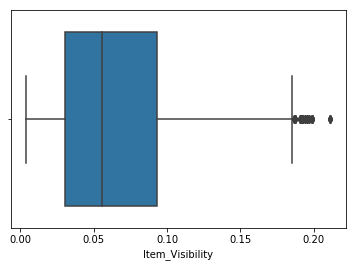

In [0]:
sns.boxplot(train1['Item_Visibility'])

###3.6) Chuyển đổi dữ liệu ký tự sang số (LabelEncoder)
---
Trong các thuộc tính của sản phẩm, ngoại trừ thuộc tính ID sản phẩm ta phải chuyển đổi sang dữ liệu số để đưa vào mô hình. Các thuộc tính cần chuyển sang dạng số bao gồm:
* Item_Fat_Content
* Item_Type
* Outlet_Identifier
* Outlet_Size
* Outlet_Location_Type
* Outlet_Type


In [0]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier         8523 non-null object
Item_Weight             8523 non-null float64
Item_Fat_Content        8523 non-null object
Item_Visibility         8523 non-null float64
Item_Type               8523 non-null object
Item_MRP                8523 non-null float64
Outlet_Identifier       8523 non-null object
Years                   8523 non-null int64
Outlet_Size             8523 non-null object
Outlet_Location_Type    8523 non-null object
Outlet_Type             8523 non-null object
Item_Outlet_Sales       8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [0]:
train2=train1
test2=test1

In [0]:
from sklearn.preprocessing import LabelEncoder

categorical_list=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [0]:
le = LabelEncoder()
for i in categorical_list:
    train2[i]=le.fit_transform(train2[i])
    train2[i]=train2[i].astype('category')
    test2[i]=le.fit_transform(test2[i])
    test2[i]=test2[i].astype('category')

In [0]:
#Dữ liệu sau khi được chuyển về dạng số
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier         8523 non-null object
Item_Weight             8523 non-null float64
Item_Fat_Content        8523 non-null category
Item_Visibility         8523 non-null float64
Item_Type               8523 non-null category
Item_MRP                8523 non-null float64
Outlet_Identifier       8523 non-null category
Years                   8523 non-null int64
Outlet_Size             8523 non-null category
Outlet_Location_Type    8523 non-null category
Outlet_Type             8523 non-null category
Item_Outlet_Sales       8523 non-null float64
dtypes: category(6), float64(4), int64(1), object(1)
memory usage: 451.2+ KB


In [0]:
test2

In [0]:
#Mối tương quan giữa các thuộc tính
train2.corr()

,Item_Weight,Item_Visibility,Item_MRP,Years,Item_Outlet_Sales
Item_Weight,1.000000,-0.017013,0.026172,0.012823,0.013261
Item_Visibility,-0.017013,1.000000,-0.002217,-0.005915,-0.013855
Item_MRP,0.026172,-0.002217,1.000000,-0.005020,0.567574
Years,0.012823,-0.005915,-0.005020,1.000000,0.049135
Item_Outlet_Sales,0.013261,-0.013855,0.567574,0.049135,1.000000


###3.7) Lưu dữ liệu sau quá trình tiền xử lý ra file .csv
---
* Dữ liệu Train sau khi đã xử lý: Train_finish.csv
* Dữ liệu Test sau khi đã xử lý: Test_finish.csv

In [0]:
train2.to_csv('Train_finish.csv',index=None, header=True)
test2.to_csv('Test_finish.csv',index=None, header=True)

##4) Xây dựng các mô hình học máy giải quyết bài toán
----


### 4.1) Chuẩn bị dữ liệu cho mô hình
---


In [0]:
#Sử dụng dữ liệu xử lý từ file:
path_train ="/content/drive/My Drive/Colab Notebooks/10Project/Data_bigmart/Train_finish.csv"
path_test = "/content/drive/My Drive/Colab Notebooks/10Project/Data_bigmart/Test_finish.csv"

#Đọc dữ liệu từ file csv vào các biến

data_train =pd.read_csv(path_train)
data_test = pd.read_csv(path_test)

In [7]:
data_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Years', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [0]:
data_train.info()

In [0]:
#Tách tập train thành X_train Y_train

X_train = data_train.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)
Y_train = data_train['Item_Outlet_Sales']


In [0]:
X_train.info()

In [0]:
#Lấy dữ liệu X_test
X_test = data_test.drop(['Item_Identifier'],axis=1)

In [0]:
X_test.info()

###4.2) Sử dụng mô hình để dự đoán
----


In [0]:
from sklearn import metrics
from math import sqrt

#### 4.2.1) Linear_Model: Ridge
---


In [21]:
#Thực hiện huấn luyện mô hình Ridge với X_train, Y_train

from sklearn.linear_model import Ridge

rr=Ridge(alpha=0.5,fit_intercept=True,normalize=True)
rr.fit(X_train,Y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [38]:
#Đánh giá sai số trên tập train:
Y_train_pred = rr.predict(X_train)

error = sqrt(metrics.mean_squared_error(Y_train,Y_train_pred))/np.mean(Y_train)
print(error)

0.5809543751936618


In [22]:
#Thực hiện dự đoán giá với mô hình Ridge ở trên cho tập dữ liệu X_test
rr_pred = rr.predict(X_test)
print(rr_pred)

[2053.51769477 1278.52779109 2249.0410367  ... 1899.97440337 2588.43296819
 1518.69499522]


In [0]:
#Xử lý lưu kết quả dự đoan của mô hình 
rr_ans=pd.Series(data=rr_pred,index=data_test.index,name='Item_Outlet_Sales')

In [0]:
rr_out=pd.DataFrame([data_test['Item_Identifier'],data_test['Outlet_Identifier'],rr_ans]).T

In [0]:
rr_out.to_csv('Ridge_out.csv',index=None, header=True)

In [0]:
rr_out

####4.2.2) Linear_model: Lasso
---


In [41]:
#Thực hiện huấn luyện mô hình Lasso với X_train, Y_train
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1,fit_intercept=True,normalize=True)
lasso.fit(X_train,Y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [42]:
#Đánh giá sai số trên tập train:
Y_train_pred = lasso.predict(X_train)

error = sqrt(metrics.mean_squared_error(Y_train,Y_train_pred))/np.mean(Y_train)
print(error)

0.5524602854211758


In [32]:
#Thực hiện dự đoán giá với mô hình Ridge ở trên cho tập dữ liệu X_test
lasso_pred = lasso.predict(X_test)
print(lasso_pred)

[1822.82037529 1036.62886326 2436.07886767 ... 1811.72507464 2923.52467832
 1234.42999519]


In [0]:
#Xử lý lưu kết quả dự đoan của mô hình 
lasso_ans=pd.Series(data=lasso_pred,index=data_test.index,name='Item_Outlet_Sales')
lasso_out=pd.DataFrame([data_test['Item_Identifier'],data_test['Outlet_Identifier'],lasso_ans]).T
lasso_out.to_csv('Lasso_out.csv',index=None, header=True)

lasso_out

####4.2.3) Model: SVR
---


In [43]:
from sklearn.svm import SVR
svr=SVR(kernel='linear',gamma='auto',C=5,epsilon=1.2)
svr.fit(X_train, Y_train)

SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=1.2, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [49]:
#Đánh giá sai số trên tập train:
Y_train_pred = svr.predict(X_train)

error = sqrt(metrics.mean_squared_error(Y_train,Y_train_pred))/np.mean(Y_train)
print(error)

1490696.3581845753


In [45]:
#Thực hiện dự đoán giá với mô hình Ridge ở trên cho tập dữ liệu X_test
svr_pred = lasso.predict(X_test)
print(svr_pred)

[1901.7489117   975.37037661 2321.88640749 ... 1758.83819896 2930.51738439
 1185.78157594]


In [0]:
#Xử lý lưu kết quả dự đoan của mô hình 
svr_ans=pd.Series(data=svr_pred,index=data_test.index,name='Item_Outlet_Sales')
svr_out=pd.DataFrame([data_test['Item_Identifier'],data_test['Outlet_Identifier'],svr_ans]).T
svr_out.to_csv('Svr_out.csv',index=None, header=True)

svr_out

####4.2.4) Model: Decision Tree
---


In [50]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [51]:
#Đánh giá sai số trên tập train:
Y_train_pred = dtr.predict(X_train)

error = sqrt(metrics.mean_squared_error(Y_train,Y_train_pred))/np.mean(Y_train)
print(error)

0.0


In [52]:
#Thực hiện dự đoán giá với mô hình Ridge ở trên cho tập dữ liệu X_test
dtr_pred = lasso.predict(X_test)
print(dtr_pred)

[1901.7489117   975.37037661 2321.88640749 ... 1758.83819896 2930.51738439
 1185.78157594]


In [0]:
#Xử lý lưu kết quả dự đoan của mô hình 
dtr_ans=pd.Series(data=dtr_pred,index=data_test.index,name='Item_Outlet_Sales')
dtr_out=pd.DataFrame([data_test['Item_Identifier'],data_test['Outlet_Identifier'],svr_ans]).T
dtr_out.to_csv('DecisionTree_out.csv',index=None, header=True)

dtr_out